Before Starting:
As in other projects, your upvotes really mean a lot to me because it tells me that Kagglers are interested in the work I am proving to you guys. So I will appreciate if you could upvote this kernel if you enjoy the work I do. Looking to share some insights with Kagglers in the comment section. Also, if updates take longer than usual it is because of work at school nevertheless, I'll try to bring more interesting updates with regards to this project. Hope you enjoy the analysis!

# **Cost of Treatment of Patient Prediction Based on Medical Cost Personal Datasets**

# **Part 1 - Pendefinisian**

---Step1. Mendefinisikan permasalahan----->
Memprediksi biaya asuransi berdasarkan dataset biaya medis perorangan

In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load in 

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
from sklearn.linear_model import LinearRegression 
from sklearn.metrics import r2_score,mean_squared_error
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import PolynomialFeatures
from sklearn.ensemble import RandomForestRegressor
import seaborn as sns
import matplotlib.pyplot as plt
import os

In [2]:
%matplotlib inline

# **Part 2 - Visualisasi Data**
----Step2.Mengambil dataset dari **insurance.csv** kedalam variabel df

In [3]:
df= pd.read_csv('insurance.csv')

----Step 3. Menampilkan 10 data teratas dari df

In [4]:
df.head(10)

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
5,31,female,25.740,0,no,southeast,3756.62160
6,46,female,33.440,1,no,southeast,8240.58960
7,37,female,27.740,3,no,northwest,7281.50560
8,37,male,29.830,2,no,northeast,6406.41070
9,60,female,25.840,0,no,northwest,28923.13692


----Step 4. Menampilkan hasil perhitungan statistik dari df

In [5]:
df.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


----Step 5. Menampilkan informasi tipe data dari setiap kolom 

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


----Step 6. Menampilkan informasi dataset berupa (jumlah data, jumlah kolom)

In [7]:
print('Number of rows and columns in the data set: ',df.shape)

Number of rows and columns in the data set:  (1338, 7)


Now we have imported dataset. When we look at the shape of dataset it has return as (1338,7).So there are  m=1338  training exaple and  n=7  independent variable. The target variable here is charges and remaining six variables such as age, sex, bmi, children, smoker, region are independent variable.

----Step 7. Mengecek jumlah kolom yang berisi nilai null berdasarkan iterasi axis=0 (dihitung dari atas ke bawah)

In [8]:
# Check for null count column wise
df.isnull().sum(axis=0)

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

---Step 8. Memvisualisasi data biaya menggunakan distplot

C:\Users\VERI\anaconda3\envs\BinisCerdas\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\VERI\anaconda3\envs\BinisCerdas\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


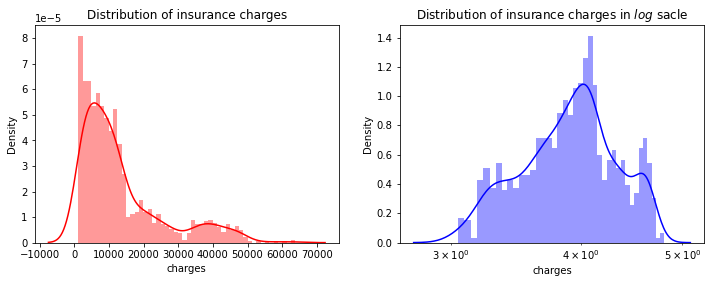

In [9]:
f= plt.figure(figsize=(12,4)) # Membuat figure baru dengan ukuran panjang 12 inch dan tinggi 4 inch

ax=f.add_subplot(121) # Memberikan nilai ke variabel ax dengan **figure f** dan plotting grid 1x2 pada subplot 1 
sns.distplot(df['charges'],bins=50,color='r',ax=ax) # Membuat histogram distribusi dari df['charges'] dengan jumlah batang 50 dan berwarna merah
ax.set_title('Distribution of insurance charges') # memberikan judul

ax=f.add_subplot(122) # Memberikan nilai ke variabel ax dengan **figure f** dan plotting grid 1x2 pada subplot 2
sns.distplot(np.log10(df['charges']),bins=40,color='b',ax=ax) # Membuat histogram distribusi dari df['charges'] dengan jumlah batang 40 dan berwarna biru yang di log basis 10
ax.set_title('Distribution of insurance charges in $log$ sacle') # memberikan judul

ax.set_xscale('log')
plt.show() # Menampilkan plotting


---Step 9. Menampilkan data kategori menggunakan barplot

- sex
- smoker
- region

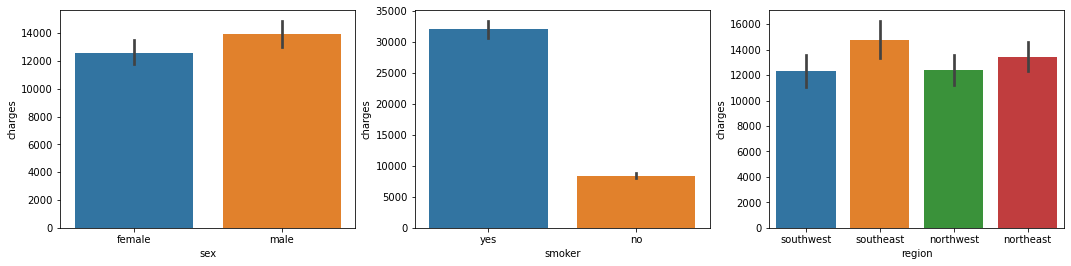

In [10]:
plt.figure(figsize=(18,4))
plt.subplot(131)
sns.barplot(x='sex', y='charges', data=df)
plt.subplot(132)
sns.barplot(x='smoker', y='charges', data=df)
plt.subplot(133)
sns.barplot(x='region', y='charges', data=df)
plt.show()

---Step 10. Menampilkan data Numeric menggunakan pairplot
- age
- bmi
- children
- charges

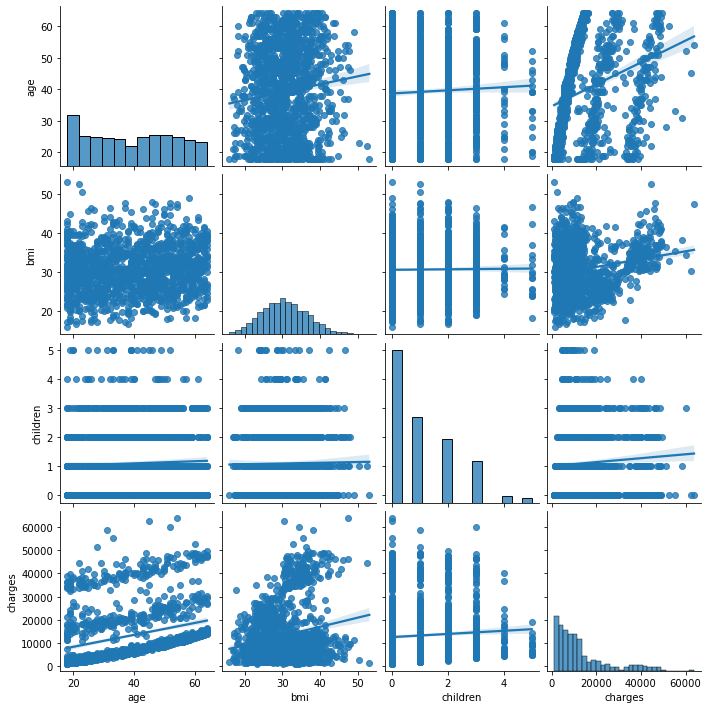

In [11]:
sns.pairplot(df,kind="reg")

---Step 11. Menampilkan korelasi data df menggunakan heatmap

<AxesSubplot:>

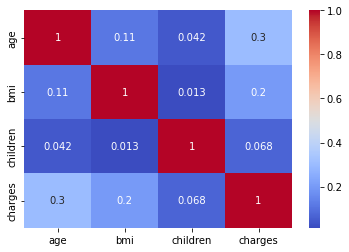

In [12]:
sns.heatmap(df.corr(), cmap='coolwarm',annot=True)

---Step 12. Mengganti nilai kolom **sex** dan **smoker** dengan nilai 1 atau 0

**Label encoding** Merubah kalimat menjadi numeric agar dapat dioperasikan di algoritma

In [13]:
df['sex']=df['sex'].map({'male':1, 'female':0})
df['smoker']=df['smoker'].map({'yes':1,'no':0})

---Step 13. Menambahkan kategori variabel baru menggunakan nilai pada kolom region 

In [14]:
df = pd.get_dummies(df, columns=['region'], drop_first=True)
df.head() # Menampilkan 5 data dari atas 

,age,sex,bmi,children,smoker,charges,region_northwest,region_southeast,region_southwest
0,19,0,27.900,0,1,16884.92400,0,0,1
1,18,1,33.770,1,0,1725.55230,0,1,0
2,28,1,33.000,3,0,4449.46200,0,1,0
3,33,1,22.705,0,0,21984.47061,1,0,0
4,32,1,28.880,0,0,3866.85520,1,0,0


# Part 3 Perhitungan
# **Train Test split**

In [15]:
from sklearn.model_selection import train_test_split
X = df.drop('charges',axis=1) # berisi nilai selain kolom charges
y = df['charges'] # berisi nilai dari kolom charges

X_train, X_test, y_train, y_test = train_test_split(X,y,random_state=0)

---Step 14. Memberikan nilai LineraRegression dengan X_train sebagai training data dan y_train sebagai target value

In [16]:
lr = LinearRegression()
lr.fit(X_train,y_train)

LinearRegression()

---Step 15. Melakukan hal sebagai berikut

        1. y_train_pred berisi nilai prediksi model linear dari X_train
        2. y_test-pred berisi nilai prediksi model linear dari X_test
        3. Menampilkan hasil dari prediksi

In [17]:
y_train_pred = lr.predict(X_train)
y_test_pred = lr.predict(X_test)
print(lr.score(X_test,y_test))

0.7958786376014413


# Melakukan perhitungan prediksi MSE

In [18]:
mean_squared_error(y_test, y_test_pred)

32135747.239381798

# Melakukan perhitungan prediksi r2_score

In [19]:
r2_score(y_test, y_test_pred)

0.7958786376014413

# Melakukan perhitungan prediksi MPD

In [20]:
from sklearn.metrics import mean_poisson_deviance
mean_poisson_deviance(y_test, y_test_pred)

2580.293699414422

**Now lets add Polynmial Feature and look at the result**

In [21]:
X = df.drop(['charges','region_northwest','region_southeast','region_southwest'], axis = 1) # berisi nilai selain kolom charges, region_northwest, region_southeast, dan region_southwest
Y = df.charges # berisi nilai kolom charges

quad = PolynomialFeatures (degree = 2) # menampung fungsi PolynomilaFeatures dengan degree = 2
x_quad = quad.fit_transform(X) # menampung hasil perubahan nilai x dalam polynomial features

X_train,X_test,Y_train,Y_test = train_test_split(x_quad,Y, random_state = 0)

plr = LinearRegression().fit(X_train,Y_train) # memberikan nilai linearregression dengan x_train sebagai training data dan y_train sebagai target value

Y_train_pred = plr.predict(X_train) # berisi nilai dari prediksi model linear dari x_train
Y_test_pred = plr.predict(X_test) # berisi nilai dari prediksi model linear dari x_test

print(plr.score(X_test,Y_test)) # menampilkan hasil dari prediksi

0.8849197344147235
